In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Your Roll Number,Your Section,CLA,Mid,Lab Internal,Therory total,Attendance,Performance
0,19110010001,CSE A,7,12,42,38,90 to 95%,Good
1,19110010002,CSE A,6,10,35,32,96 to 100%,Average
2,19110010003,CSE A,6,13,38,38,90 to 95%,Good
3,19110010004,CSE A,7,11,36,36,96 to 100%,Good
4,19110010005,CSE D,6,9,49,30,96 to 100%,Poor


In [4]:
X = df.iloc[:,2 :-2].values
y = df.iloc[:, 7].values



In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#The above script splits the dataset into 80% train data and 20% test data.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0  0  0]
 [ 0  7  0  0  0]
 [ 2  0 13  0  0]
 [ 0  0  0  4  0]
 [ 0  1  1  0  6]]
              precision    recall  f1-score   support

     Average       0.75      1.00      0.86         6
   Excellent       0.88      1.00      0.93         7
        Good       0.93      0.87      0.90        15
        Poor       1.00      1.00      1.00         4
   Very Good       1.00      0.75      0.86         8

    accuracy                           0.90        40
   macro avg       0.91      0.92      0.91        40
weighted avg       0.91      0.90      0.90        40



In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)*100

90.0

In [38]:
error = []

# Calculating error for K values between 1 and 15
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

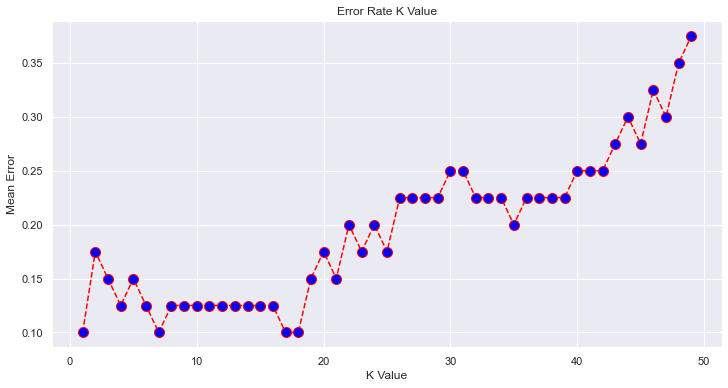

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')